In [3]:
!pip install autofeat

     |████████████████████████████████| 215kB 3.8MB/s 


In [4]:
import pandas as pd
import numpy as np
from autofeat import FeatureSelector,AutoFeatRegressor, AutoFeatClassifier, AutoFeatModel
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston,load_wine
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
data = load_boston()
X = data.data
y= data.target

In [12]:
X.shape

(506, 13)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =0)


In [7]:
model = AutoFeatRegressor()
df = model.fit_transform(X, y)
pred = model.predict(X_test)

In [8]:
df

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x005**2/x010,x005**3/x009,x008**3*exp(x005),x000*x011**3,x009**3/x012,1/(x002*x007),1/(x007*x012),log(x004)/x007,sqrt(x011)/x010,exp(x005)*log(x000),x006**2/x008,x012**3*exp(x005),x005**3*sqrt(x011),exp(x005)*log(x007),x000**2*x003,x009**3/x008,x009**3*x012**2,sqrt(x000)*x004**3,x010**3*sqrt(x012)
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,2.825531,0.960275,716.945624,3.951485e+05,5.207698e+06,0.105844,0.049096,-0.151564,1.302114,-3630.638503,4251.040000,88547.080546,5662.755635,1009.850153,0.0,25934336.0,6.431819e+08,0.012380,7992.616290
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2.316249,1.093938,4916.939395,1.707517e+06,1.550600e+06,0.028476,0.022027,-0.152434,1.119233,-2212.931477,3112.605000,469292.329174,5274.102419,985.131038,0.0,7086244.0,1.183964e+09,0.017048,17050.342400
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,2.900237,1.532728,10555.913906,1.654312e+06,3.516746e+06,0.028476,0.049957,-0.152434,1.113480,-4751.790753,1866.605000,86361.661863,7351.613065,2114.925075,0.0,7086244.0,2.301740e+08,0.017042,11321.723127
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.618824,1.543721,29549.936266,1.989358e+06,3.721445e+06,0.075668,0.056108,-0.128812,1.062315,-3754.508972,699.213333,27812.163614,6807.957927,1972.264278,0.0,3647016.0,9.457004e+07,0.017285,11212.397472
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2.731530,1.644441,34297.812856,4.317248e+06,2.052729e+06,0.075668,0.030949,-0.128812,1.065366,-3395.387438,979.213333,192346.500484,7272.971668,2289.153875,0.0,3647016.0,3.108231e+08,0.025245,15096.922448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,2.069888,1.049752,729.967491,3.772310e+06,2.104076e+06,0.033818,0.041722,-0.224671,0.942797,-2022.382877,4774.810000,660059.280161,5673.965897,662.587027,0.0,20346417.0,1.902571e+09,0.047082,28798.583126
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1.783543,0.839637,454.864694,2.830439e+06,2.240795e+06,0.036644,0.048145,-0.243440,0.948683,-1407.856591,5882.890000,340517.765461,4566.619385,376.382121,0.0,20346417.0,1.677489e+09,0.040028,27906.206813
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,2.317361,1.243531,1070.627281,3.798928e+06,3.607521e+06,0.038672,0.081802,-0.256918,0.948683,-2998.638158,8281.000000,192077.112221,6763.320453,828.209889,0.0,20346417.0,6.472114e+08,0.046374,21993.656414
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,2.198021,1.148719,892.476337,6.674820e+06,3.139879e+06,0.035088,0.064599,-0.233107,0.944551,-1973.273347,7974.490000,242840.840677,6220.444254,777.197854,0.0,20346417.0,8.543542e+08,0.062280,23574.657242


In [ ]:
print("Final R^2: %.4f" % model.score(df, y))

Final R^2: 0.9074


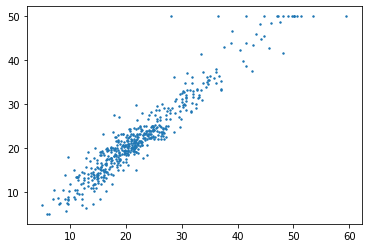

In [ ]:
plt.figure()
plt.scatter(model.predict(df), y, s=2);

In [10]:
df_test = model.transform(X_test)

In [11]:
df_test

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x005**2/x010,x005**3/x009,x008**3*exp(x005),x000*x011**3,x009**3/x012,1/(x002*x007),1/(x007*x012),log(x004)/x007,sqrt(x011)/x010,exp(x005)*log(x000),x006**2/x008,x012**3*exp(x005),x005**3*sqrt(x011),exp(x005)*log(x007),x000**2*x003,x009**3/x008,x009**3*x012**2,sqrt(x000)*x004**3,x010**3*sqrt(x012)
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,2.373189,0.590691,3.602193e+04,3.551820e+06,1.083202e+07,0.059188,0.026127,-0.148914,1.146174,-1519.386242,73.960000,2.225744e+05,4920.006385,929.513368,0.000000,19876750.0,4.283487e+09,0.025240,13077.000604
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,1.912805,0.360627,6.921628e+06,4.531970e+08,3.099772e+07,0.047257,0.089754,-0.393849,0.947280,1112.902075,416.666667,4.333644e+05,4595.814982,78.225918,0.000000,12308679.0,2.682925e+10,0.763384,25444.888883
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,2.476532,0.937827,7.322658e+04,6.974046e+06,2.002341e+06,0.021406,0.028317,-0.177753,1.209932,-1270.842155,1707.552000,6.781513e+05,5136.136106,710.545403,0.013053,4204915.2,2.317960e+09,0.056236,14293.092150
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,1.416426,0.229797,2.908539e+06,1.550689e+09,1.494225e+07,0.032446,0.029705,-0.215366,0.986255,675.568846,384.000000,1.625778e+06,3049.006450,111.989266,0.000000,12308679.0,1.154612e+11,1.657450,36648.604559
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,2.076889,0.608134,6.359650e+04,3.257259e+06,5.108978e+06,0.015545,0.016162,-0.165099,1.051180,-1462.324142,576.738000,9.560238e+05,4757.742057,820.269681,0.000000,12608958.4,9.600184e+09,0.019830,22971.132107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2.731530,1.644441,3.429781e+04,4.317248e+06,2.052729e+06,0.075668,0.030949,-0.128812,1.065366,-3395.387438,979.213333,1.923465e+05,7272.971668,2289.153875,0.000000,3647016.0,3.108231e+08,0.025245,15096.922448
148,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,1.898676,0.356639,6.764247e+06,6.667772e+06,1.372715e+07,0.028543,0.024007,-0.200007,0.486888,977.168226,254.150417,4.876548e+06,2336.059144,323.150033,0.000000,12308679.0,1.368067e+11,0.849685,38236.245540
149,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,1.378551,0.220641,2.706486e+06,1.051133e+09,9.588065e+06,0.038741,0.022759,-0.250105,0.986255,552.511674,400.983750,5.725944e+06,2927.533221,69.491413,0.000000,12308679.0,2.804181e+11,1.406375,45750.933256
150,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54,2.392567,0.960836,4.872186e+04,3.082284e+07,6.188208e+06,0.030448,0.066395,-0.183513,1.082736,-538.442538,1701.562500,7.123796e+04,5819.200634,912.934601,0.000000,7023616.0,5.790719e+08,0.113035,13273.375953


In [16]:
model = AutoFeatModel(problem_type='regression')
model.fit(X,y)
model

AutoFeatModel(always_return_numpy=False, apply_pi_theorem=True,
              categorical_cols=None, feateng_cols=None, feateng_steps=2,
              featsel_runs=5, max_gb=None, n_jobs=1, problem_type='regression',
              transformations=('1/', 'exp', 'log', 'abs', 'sqrt', '^2', '^3'),
              units=None, verbose=0)

In [18]:
df = model.fit_transform(X, y)
y_pred = model.predict(X_test)
print("Final R^2: %.4f" % model.score(df, y))

Final R^2: 0.8908


In [8]:
X,y = load_wine(True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =0)
model = AutoFeatClassifier()
df = model.fit_transform(X, y)
y_pred = model.predict(X_test)

In [10]:
print("Final Accuracy: %.4f" % model.score(df, y))

Final Accuracy: 0.9944


In [20]:
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(pd.DataFrame(X), pd.DataFrame(y))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 11 features after 5 feature selection runs
[featsel] 10 features after correlation filtering
[featsel] 8 features after noise filtering
